<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Seasons 2021-22 to 2023-24</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Team Level Data](#1.-Team-Level-Data)**

- [1.1. Rolling Average Box Scores](#1.1.-Rolling-Average-Box-Scores)

# Setup

[Return to top](#EDAp)

In [1]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

# Data

[Return to top](#EDAp)

In [2]:
team_bs_matchups_roll_df = pd.read_csv('../data/processed/nba_team_matchups_rolling_box_scores_2015_2024_r05.csv')

# convert 'GAME_DATE' column to datetime
team_bs_matchups_roll_df['GAME_DATE'] = pd.to_datetime(team_bs_matchups_roll_df['GAME_DATE'])

# filter to include only last three seasons
seasons_to_keep = ['2021-22', '2022-23', '2023-24']
team_bs_matchups_roll_df = team_bs_matchups_roll_df[team_bs_matchups_roll_df['SEASON_ID'].isin(seasons_to_keep)]

In [3]:
team_bs_matchups_roll_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 8239 to 11410
Data columns (total 92 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SEASON_ID               3172 non-null   object        
 1   HOME_TEAM_ID            3172 non-null   int64         
 2   HOME_TEAM_ABBREVIATION  3172 non-null   object        
 3   HOME_TEAM_NAME          3172 non-null   object        
 4   GAME_ID                 3172 non-null   int64         
 5   GAME_DATE               3172 non-null   datetime64[ns]
 6   HOME_WL                 3171 non-null   object        
 7   HOME_MIN                3172 non-null   int64         
 8   HOME_PTS                3172 non-null   int64         
 9   HOME_FGM                3172 non-null   int64         
 10  HOME_FGA                3172 non-null   int64         
 11  HOME_FG_PCT             3172 non-null   float64       
 12  HOME_FG3M               3172 non-null   int64    

In [4]:
team_bs_matchups_roll_df.head()

,SEASON_ID,HOME_TEAM_ID,HOME_TEAM_ABBREVIATION,HOME_TEAM_NAME,GAME_ID,GAME_DATE,HOME_WL,HOME_MIN,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG_PCT,HOME_FG3M,HOME_FG3A,HOME_FG3_PCT,HOME_FTM,HOME_FTA,HOME_FT_PCT,HOME_OREB,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,...,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_HOME_PLUS_MINUS,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF,ROLL_AWAY_PLUS_MINUS
8239,2021-22,1610612737,ATL,Atlanta Hawks,22100014,2021-10-21,W,242,113,45,94,0.479,15,35.0,0.429,8,9,0.889,6.0,49.0,55.0,31,8.0,9,13,...,26.200,7.000,5.800,11.400,18.200,17.80,118.200,43.400,89.600,0.484,15.600,38.600,0.403,15.80,18.20,0.859,10.400,28.40,38.800,27.2,6.80,4.000,12.40,19.00,1.400
8240,2021-22,1610612737,ATL,Atlanta Hawks,22100043,2021-10-25,W,238,122,46,90,0.511,12,32.0,0.375,18,21,0.857,10.0,39.0,49.0,24,11.0,3,13,...,31.000,8.000,9.000,13.000,16.000,26.00,82.000,34.000,88.000,0.386,5.000,28.000,0.179,9.00,15.00,0.600,11.000,42.00,53.000,14.0,9.00,8.000,20.00,17.00,-15.000
8241,2021-22,1610612737,ATL,Atlanta Hawks,22100097,2021-11-01,W,240,118,38,83,0.458,13,34.0,0.382,29,29,1.000,13.0,34.0,47.0,24,9.0,5,11,...,27.500,9.500,6.000,13.000,17.500,22.00,101.333,37.333,86.667,0.434,7.667,30.333,0.259,19.00,25.00,0.761,9.333,41.00,50.333,18.0,9.00,6.667,16.00,18.00,3.333
8242,2021-22,1610612737,ATL,Atlanta Hawks,22100120,2021-11-04,L,240,98,35,82,0.427,7,28.0,0.250,21,26,0.808,5.0,27.0,32.0,18,11.0,4,9,...,26.333,9.333,5.667,12.333,17.333,17.00,109.500,37.000,85.500,0.435,13.750,40.750,0.336,21.75,24.75,0.886,11.000,40.75,51.750,17.0,8.25,6.000,16.25,17.75,11.000
8243,2021-22,1610612737,ATL,Atlanta Hawks,22100193,2021-11-14,W,241,120,47,97,0.485,15,35.0,0.429,11,13,0.846,15.0,36.0,51.0,21,6.0,1,12,...,24.250,9.750,5.250,11.500,19.000,8.25,110.800,41.400,92.200,0.450,16.800,41.800,0.396,11.20,16.00,0.703,12.400,36.00,48.400,23.6,7.40,4.800,12.00,15.80,6.600


In [5]:
team_bs_matchups_roll_df.describe()

,HOME_TEAM_ID,GAME_ID,GAME_DATE,HOME_MIN,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG_PCT,HOME_FG3M,HOME_FG3A,HOME_FG3_PCT,HOME_FTM,HOME_FTA,HOME_FT_PCT,HOME_OREB,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,HOME_PF,HOME_PLUS_MINUS,AWAY_TEAM_ID,AWAY_MIN,...,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_HOME_PLUS_MINUS,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF,ROLL_AWAY_PLUS_MINUS
count,3.172e+03,3.172e+03,3172,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3.172e+03,3172.000,...,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000,3172.000
mean,1.611e+09,2.220e+07,2022-11-10 04:52:48.726355456,241.615,114.396,41.882,88.426,0.475,12.684,34.971,0.362,17.949,22.952,0.782,10.481,33.738,44.220,25.719,7.447,4.875,13.092,19.635,2.103,1.611e+09,241.619,...,25.558,7.491,4.919,13.167,19.710,2.173,111.986,41.107,88.447,0.466,12.269,34.566,0.354,17.503,22.522,0.778,10.422,33.166,43.588,24.841,7.463,4.716,13.377,19.950,-2.210
min,1.611e+09,2.210e+07,2021-10-19 00:00:00,238.000,77.000,23.000,67.000,0.288,2.000,12.000,0.095,3.000,5.000,0.308,0.000,16.000,24.000,11.000,0.000,0.000,1.000,8.000,-56.000,1.611e+09,238.000,...,14.000,3.200,0.000,6.400,13.800,-33.000,82.000,30.000,75.000,0.333,5.000,22.000,0.172,5.000,9.000,0.529,4.000,20.000,29.000,14.000,2.000,0.000,7.000,11.000,-42.000
25%,1.611e+09,2.210e+07,2022-02-06 00:00:00,240.000,106.000,38.000,84.000,0.435,10.000,30.000,0.306,14.000,18.000,0.714,8.000,30.000,40.000,22.000,5.000,3.000,10.000,17.000,-8.000,1.611e+09,240.000,...,23.400,6.400,4.000,11.800,18.238,-3.200,107.200,39.000,85.600,0.446,10.600,31.200,0.326,15.600,20.000,0.743,9.000,31.200,41.200,22.800,6.400,3.800,12.000,18.400,-7.400
50%,1.611e+09,2.220e+07,2022-12-07 00:00:00,240.000,114.000,42.000,88.000,0.473,12.000,34.000,0.361,17.000,22.000,0.786,10.000,34.000,44.000,25.000,7.000,5.000,13.000,19.000,3.000,1.611e+09,240.000,...,25.400,7.400,4.800,13.000,19.775,2.250,112.000,41.000,88.200,0.466,12.000,34.200,0.353,17.400,22.400,0.782,10.200,33.000,43.400,24.600,7.400,4.600,13.200,19.800,-2.200
75%,1.611e+09,2.220e+07,2023-04-02 00:00:00,241.000,123.000,45.000,93.000,0.512,15.000,39.000,0.419,22.000,28.000,0.850,13.000,37.000,49.000,29.000,9.000,6.000,16.000,22.000,11.000,1.611e+09,241.000,...,27.600,8.400,5.800,14.600,21.000,7.600,116.800,43.000,91.000,0.486,13.750,37.800,0.381,19.400,25.000,0.815,11.800,35.000,45.800,26.800,8.400,5.600,14.667,21.400,3.000
max,1.611e+09,6.230e+07,2024-02-04 00:00:00,316.000,175.000,60.000,121.000,0.655,27.000,59.000,0.645,44.000,52.000,1.000,27.000,54.000,69.000,50.000,21.000,17.000,27.000,35.000,73.000,1.611e+09,316.000,...,38.000,18.000,17.000,25.000,29.000,42.000,138.600,52.200,117.000,0.570,24.000,57.000,0.548,32.000,44.000,1.000,21.000,48.000,62.000,39.000,16.000,13.000,30.000,30.000,32.000
std,8.663e+00,7.164e+05,NaN,6.786,12.538,5.214,7.100,0.055,3.863,6.816,0.084,5.950,7.071,0.099,3.899,5.416,6.734,5.070,2.835,2.488,3.781,3.926,14.672,8.644e+00,6.801,...,3.094,1.539,1.410,2.033,2.093,8.363,7.178,2.950,4.058,0.030,2.247,4.546,0.041,2.985,3.626,0.055,2.255,2.978,3.654,2.991,1.544,1.371,2.148,2.285,8.165


<a name="1.-Team-Level-Data"></a>
# 1. Team Level Data

[Return to top](#EDAp)

<a name="1.1.-Rolling-Average-Box-Scores"></a>
## 1.1. Rolling Average Box Scores

[Return to top](#EDAp)

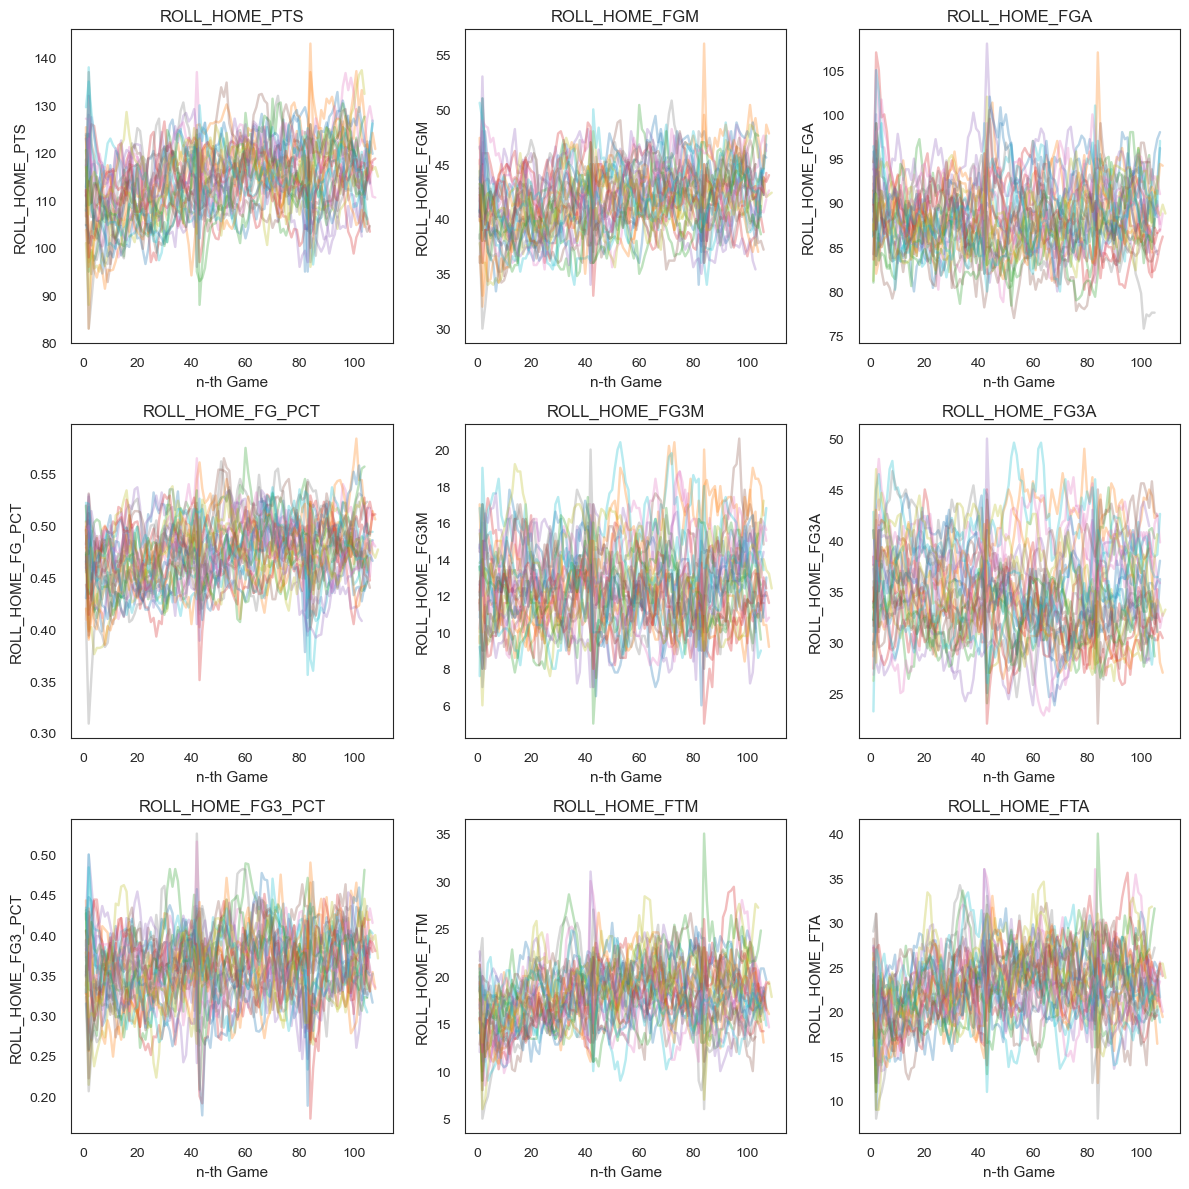

In [6]:
# plot for Home Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'HOME_TEAM_NAME', 'ROLL_HOME_')

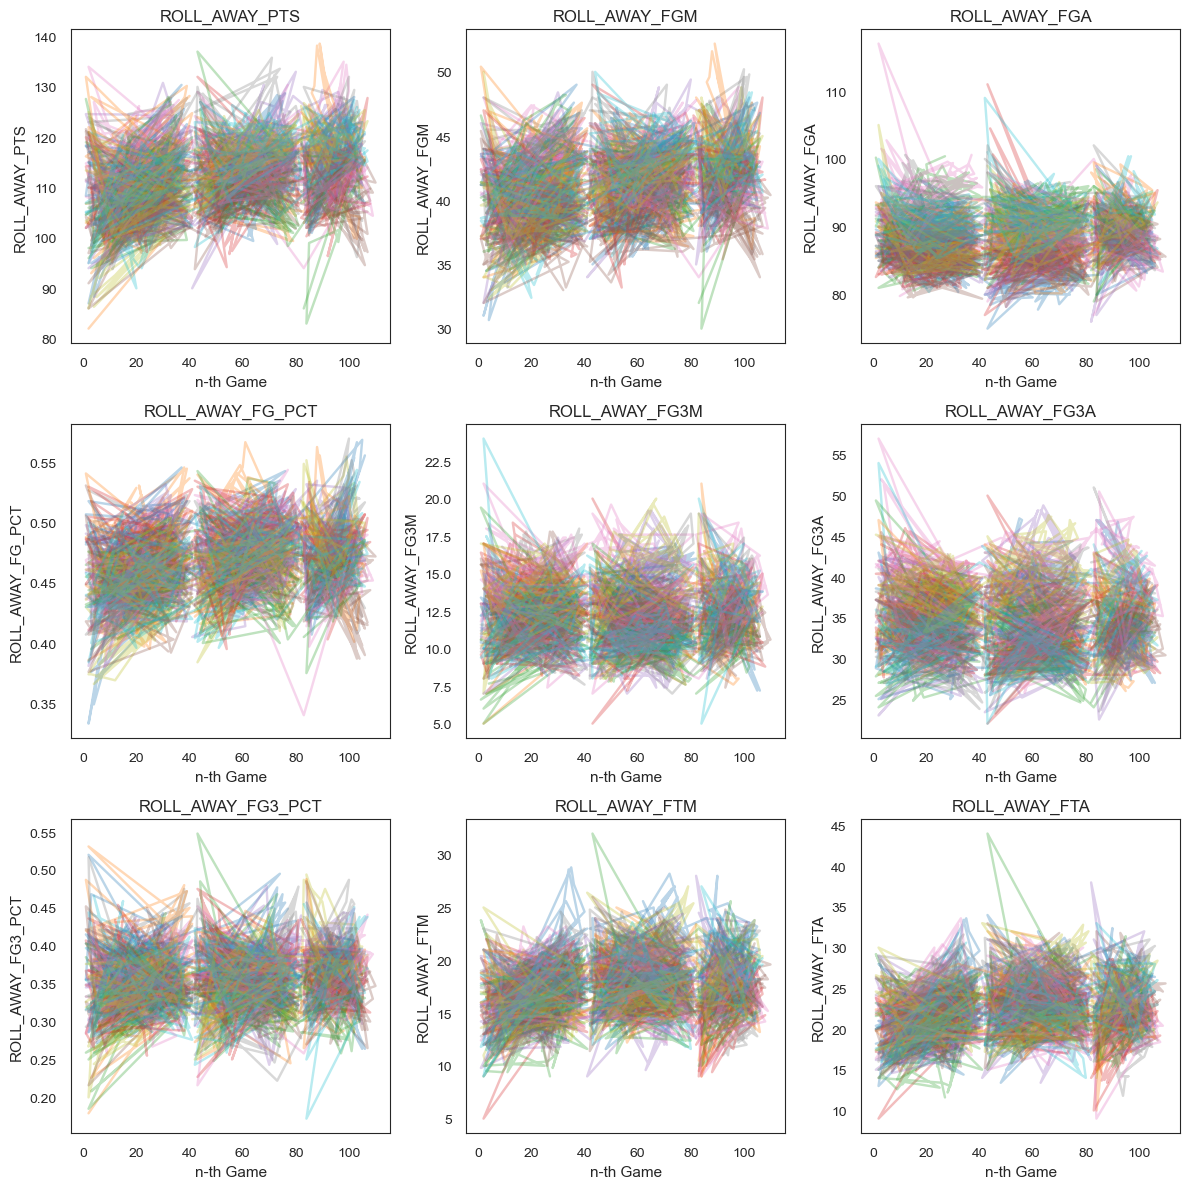

In [7]:
# plot for Away Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'AWAY_TEAM_NAME', 'ROLL_AWAY_')